In [1]:
import numpy as np
import pandas as pd
#Visualización
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#cogemos los datos de la estación Barcelona-Poblenou
url_fichero = '../barcelona-(poblenou), catalunya, spain-air-quality.csv'
dfContBarcPobl = pd.read_csv(url_fichero)

#cambiamos el encabezado para eliminar los espacios con los que viene el .csv en los títulos de las columnas.
columnNames = ['date','pm10','o3','no2','so2','co']
dfContBarcPobl.columns = columnNames
dfContBarcPobl.head()


,date,pm10,o3,no2,so2,co
0,2020/12/1,20,,16,,
1,2020/12/2,17,,17,,
2,2020/12/3,18,,21,,
3,2020/12/4,18,,13,,
4,2020/12/5,20,,4,,


In [2]:
dfContBarcPobl.dtypes

date    object
pm10    object
o3      object
no2     object
so2     object
co      object
dtype: object

In [3]:
#Establecemos los tipos adecuados de los campos
dfContBarcPobl ['date'] = pd.to_datetime(dfContBarcPobl['date'], format='%Y-%m-%d', errors='coerce')
dfContBarcPobl ['pm10'] = pd.to_numeric(dfContBarcPobl['pm10'], errors='coerce')
dfContBarcPobl ['o3'] = pd.to_numeric(dfContBarcPobl['o3'], errors='coerce')
dfContBarcPobl ['no2'] = pd.to_numeric(dfContBarcPobl['no2'], errors='coerce')
dfContBarcPobl ['so2'] = pd.to_numeric(dfContBarcPobl['so2'], errors='coerce')
dfContBarcPobl ['co'] = pd.to_numeric(dfContBarcPobl['co'], errors='coerce')

In [4]:
print(dfContBarcPobl)
print(dfContBarcPobl.dtypes)
print(dfContBarcPobl.describe())

           date  pm10  o3   no2  so2  co
0    2020-12-01  20.0 NaN  16.0  NaN NaN
1    2020-12-02  17.0 NaN  17.0  NaN NaN
2    2020-12-03  18.0 NaN  21.0  NaN NaN
3    2020-12-04  18.0 NaN  13.0  NaN NaN
4    2020-12-05  20.0 NaN   4.0  NaN NaN
...         ...   ...  ..   ...  ...  ..
2246 2014-09-26   NaN NaN  17.0  NaN NaN
2247 2014-09-27   NaN NaN  18.0  NaN NaN
2248 2014-09-28   NaN NaN  17.0  NaN NaN
2249 2014-09-29   NaN NaN  16.0  NaN NaN
2250 2014-09-30   NaN NaN  16.0  NaN NaN

[2251 rows x 6 columns]
date    datetime64[ns]
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
dtype: object
              pm10          o3          no2        so2   co
count  1787.000000  183.000000  2228.000000  19.000000  0.0
mean     24.251819   26.792350    18.065530   1.368421  NaN
std      10.292113   16.292672     7.273366   1.116071  NaN
min       1.000000    1.000000     2.000000   1.000000  NaN
25%      17.000000   16.500000 

Averiguamos cuántos nulos nos vienen en cada columna:

In [5]:
dfContBarcPobl.isnull().sum()

date       0
pm10     464
o3      2068
no2       23
so2     2232
co      2251
dtype: int64

La columna de medida de CO no trae ningún dato, y las columnas de SO2 y de O3 traen apenas unos pocos.
Por tanto, tendremos que quitar dichas medidas y nos quedamos exclusivamente con las medidas de PM10 y NO2

In [6]:
dfContBarcPobl_PM10_NO2 = dfContBarcPobl.drop(['co','so2','o3'], axis=1)
print(dfContBarcPobl_PM10_NO2)
print(dfContBarcPobl_PM10_NO2.describe())

           date  pm10   no2
0    2020-12-01  20.0  16.0
1    2020-12-02  17.0  17.0
2    2020-12-03  18.0  21.0
3    2020-12-04  18.0  13.0
4    2020-12-05  20.0   4.0
...         ...   ...   ...
2246 2014-09-26   NaN  17.0
2247 2014-09-27   NaN  18.0
2248 2014-09-28   NaN  17.0
2249 2014-09-29   NaN  16.0
2250 2014-09-30   NaN  16.0

[2251 rows x 3 columns]
              pm10          no2
count  1787.000000  2228.000000
mean     24.251819    18.065530
std      10.292113     7.273366
min       1.000000     2.000000
25%      17.000000    13.000000
50%      23.000000    18.000000
75%      30.000000    23.000000
max     153.000000    60.000000


Visualizamos un scatterplot

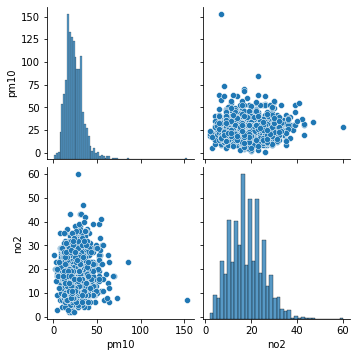

In [7]:
sns.pairplot(dfContBarcPobl_PM10_NO2);

Y observamos la correlación entre las medidas:

In [8]:
#matriz de correlaciones
dfContBarcPobl_PM10_NO2.corr()

,pm10,no2
pm10,1.000000,0.091599
no2,0.091599,1.000000


Vemos que no hay correlación prácticamente entre ambos contaminantes

In [9]:
#matriz de covarianzas
dfContBarcPobl_PM10_NO2.cov()

,pm10,no2
pm10,105.927593,6.822195
no2,6.822195,52.901856


Ahora vamos a quedarnos con los datos de 2018 y 2019 exclusivamente

In [10]:
#primero ordenamos el dataset por fecha descendente
dfContBarcPobl_PM10_NO2 = dfContBarcPobl_PM10_NO2.sort_values(by='date', ascending=False)
print(dfContBarcPobl_PM10_NO2)

           date  pm10   no2
27   2020-12-28  10.0   NaN
26   2020-12-27  10.0   7.0
25   2020-12-26   9.0  10.0
24   2020-12-25  13.0   7.0
23   2020-12-24  27.0   4.0
...         ...   ...   ...
2249 2014-09-29   NaN  16.0
2248 2014-09-28   NaN  17.0
2247 2014-09-27   NaN  18.0
2246 2014-09-26   NaN  17.0
2245 2014-09-25   NaN  15.0

[2251 rows x 3 columns]


In [11]:
#establecemos la fecha como índice
dfContBarcPobl_PM10_NO2 = dfContBarcPobl_PM10_NO2.set_index('date')
print(dfContBarcPobl_PM10_NO2)

            pm10   no2
date                  
2020-12-28  10.0   NaN
2020-12-27  10.0   7.0
2020-12-26   9.0  10.0
2020-12-25  13.0   7.0
2020-12-24  27.0   4.0
...          ...   ...
2014-09-29   NaN  16.0
2014-09-28   NaN  17.0
2014-09-27   NaN  18.0
2014-09-26   NaN  17.0
2014-09-25   NaN  15.0

[2251 rows x 2 columns]


In [12]:
dfContBarcPobl_PM10_NO2_2018_2019 = dfContBarcPobl_PM10_NO2['2019':'2018']
print(dfContBarcPobl_PM10_NO2_2018_2019)

            pm10   no2
date                  
2019-12-31   NaN  15.0
2019-12-29  23.0   NaN
2019-12-28  19.0  16.0
2019-12-27  16.0  18.0
2019-12-26  18.0  15.0
...          ...   ...
2018-01-05  10.0  20.0
2018-01-04  11.0  14.0
2018-01-03  10.0   7.0
2018-01-02  11.0  10.0
2018-01-01  10.0  24.0

[728 rows x 2 columns]


In [13]:
dfContBarcPobl_PM10_NO2_2018_2019.isnull().sum()

pm10    11
no2      3
dtype: int64

Rellenamos los nulos con los valores medios:

In [14]:
#Primero creamos la copia para rellenar
dfContBarcPobl_PM10_NO2_2018_2019_rellenado = dfContBarcPobl_PM10_NO2_2018_2019.copy()

#Importamos la función SimpleImputer del módulo sklearn.impute
from sklearn.impute import SimpleImputer

#Instanciamos el imputador de estrategia media
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

#Ahora rellenamos los valores faltantes de ambos contaminantes con los valores medios.
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['pm10'] = imp_mean.fit_transform(dfContBarcPobl_PM10_NO2_2018_2019['pm10'].values.reshape(-1,1))
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['no2'] = imp_mean.fit_transform(dfContBarcPobl_PM10_NO2_2018_2019['no2'].values.reshape(-1,1))

In [15]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.isnull().sum()

pm10    0
no2     0
dtype: int64

Pintamos la serie temporal de cada medida:

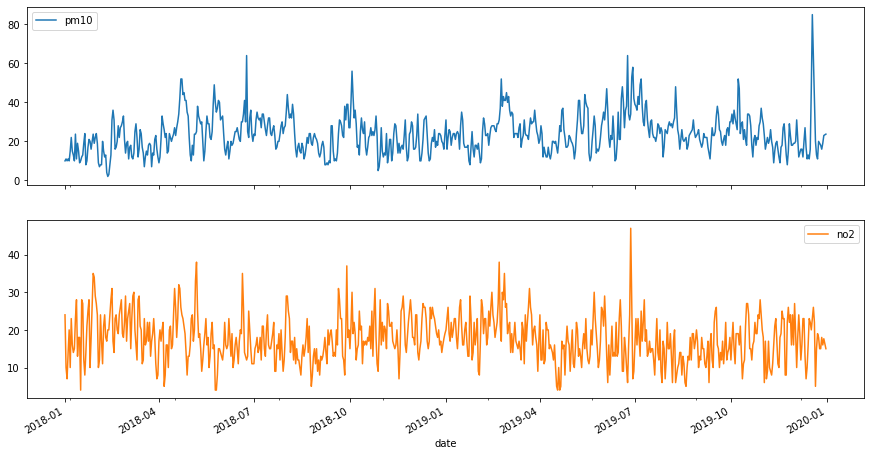

In [16]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.plot(subplots = True, figsize=(15,8));

Pintamos la gráfica de densidad de cada contaminante, y vemos que sus medidas son del mismo orden de magnitud

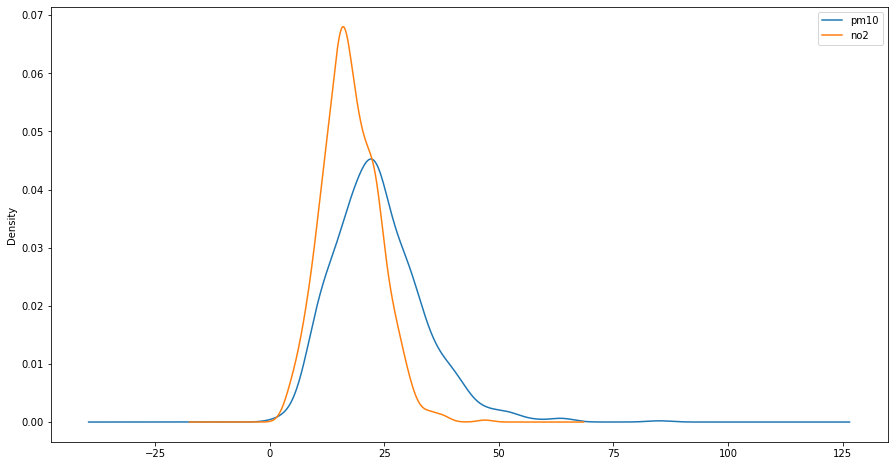

In [17]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.plot(kind = 'density',figsize=(15,8));

In [18]:
print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado.describe())

             pm10         no2
count  728.000000  728.000000
mean    23.712692   17.641379
std      9.831791    6.124652
min      2.000000    4.000000
25%     17.000000   13.000000
50%     23.000000   17.000000
75%     29.000000   22.000000
max     85.000000   47.000000


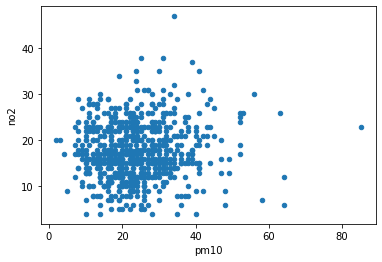

In [19]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.plot.scatter('pm10','no2');

Seguimos observando que ambos contaminantes no guardan ninguna correlación

Veamos ahora si siguen algún tipo de ciclo anual.

In [20]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['year'] = dfContBarcPobl_PM10_NO2_2018_2019_rellenado.index.year
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['month'] = dfContBarcPobl_PM10_NO2_2018_2019_rellenado.index.month
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['day'] = dfContBarcPobl_PM10_NO2_2018_2019_rellenado.index.day
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['month-day'] = dfContBarcPobl_PM10_NO2_2018_2019_rellenado.index.strftime('%m-%d')
dfContBarcPobl_PM10_NO2_2018_2019_rellenado ['month-day'] = pd.to_datetime(dfContBarcPobl_PM10_NO2_2018_2019_rellenado['month-day'], format='%m-%d', errors='coerce')

print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado)
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.dtypes

                 pm10        no2  year  month  day  month-day
date                                                         
2019-12-31  23.712692  15.000000  2019     12   31 1900-12-31
2019-12-29  23.000000  17.641379  2019     12   29 1900-12-29
2019-12-28  19.000000  16.000000  2019     12   28 1900-12-28
2019-12-27  16.000000  18.000000  2019     12   27 1900-12-27
2019-12-26  18.000000  15.000000  2019     12   26 1900-12-26
...               ...        ...   ...    ...  ...        ...
2018-01-05  10.000000  20.000000  2018      1    5 1900-01-05
2018-01-04  11.000000  14.000000  2018      1    4 1900-01-04
2018-01-03  10.000000   7.000000  2018      1    3 1900-01-03
2018-01-02  11.000000  10.000000  2018      1    2 1900-01-02
2018-01-01  10.000000  24.000000  2018      1    1 1900-01-01

[728 rows x 6 columns]


pm10                float64
no2                 float64
year                  int64
month                 int64
day                   int64
month-day    datetime64[ns]
dtype: object

De momento no veo otra manera de hacer el campo month-day como fecha para que en la siguiente gráfica se muestre limpiamente. Pero habría que conseguir que no muestre año 1900

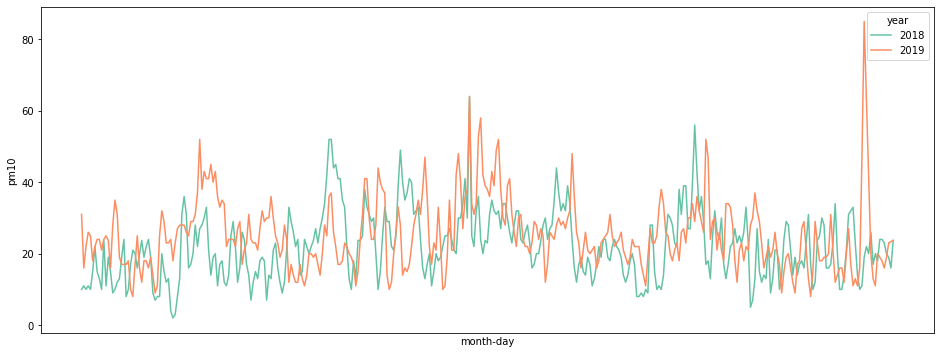

In [21]:
import calendar
plt.figure(figsize=(16, 6))
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
sns.lineplot(x='month-day', y='pm10', hue= 'year', palette= 'Set2', data=dfContBarcPobl_PM10_NO2_2018_2019_rellenado);

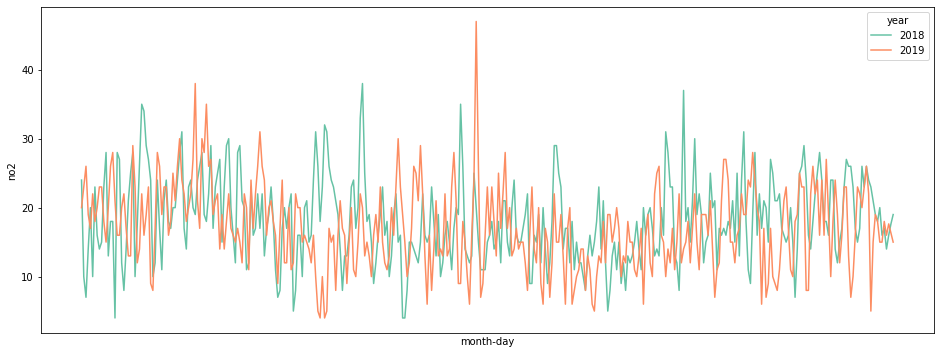

In [22]:
plt.figure(figsize=(16, 6))
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
sns.lineplot(x='month-day', y='no2', hue= 'year', palette= 'Set2', data=dfContBarcPobl_PM10_NO2_2018_2019_rellenado);

Tratamos ahora de pintar líneas medias en los gráficos

In [23]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado = dfContBarcPobl_PM10_NO2_2018_2019_rellenado.sort_values(by='date')

In [24]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['ndia'] = np.arange(1,729)
print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado)

                 pm10        no2  year  month  day  month-day  ndia
date                                                               
2018-01-01  10.000000  24.000000  2018      1    1 1900-01-01     1
2018-01-02  11.000000  10.000000  2018      1    2 1900-01-02     2
2018-01-03  10.000000   7.000000  2018      1    3 1900-01-03     3
2018-01-04  11.000000  14.000000  2018      1    4 1900-01-04     4
2018-01-05  10.000000  20.000000  2018      1    5 1900-01-05     5
...               ...        ...   ...    ...  ...        ...   ...
2019-12-26  18.000000  15.000000  2019     12   26 1900-12-26   724
2019-12-27  16.000000  18.000000  2019     12   27 1900-12-27   725
2019-12-28  19.000000  16.000000  2019     12   28 1900-12-28   726
2019-12-29  23.000000  17.641379  2019     12   29 1900-12-29   727
2019-12-31  23.712692  15.000000  2019     12   31 1900-12-31   728

[728 rows x 7 columns]


In [25]:
lineamediapm10 = np.polyfit(dfContBarcPobl_PM10_NO2_2018_2019_rellenado['ndia'], dfContBarcPobl_PM10_NO2_2018_2019_rellenado['pm10'], 6)
print(lineamediapm10)

[ 3.09867377e-14 -6.34774531e-11  4.65599443e-08 -1.41642798e-05
  1.32428054e-03  8.99892821e-02  1.20350218e+01]


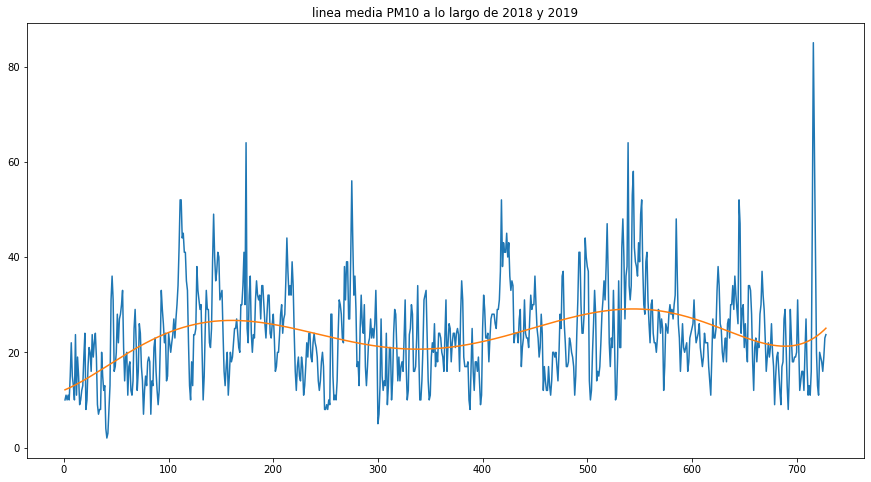

In [26]:
yl=np.poly1d(lineamediapm10)
xl=np.arange(1,729)
plt.figure(figsize=(15,8))
plt.title('linea media PM10 a lo largo de 2018 y 2019')
plt.plot(dfContBarcPobl_PM10_NO2_2018_2019_rellenado['ndia'],dfContBarcPobl_PM10_NO2_2018_2019_rellenado['pm10'], '-', xl, yl(xl), '-')
plt.show()

In [27]:
lineamediano2 = np.polyfit(dfContBarcPobl_PM10_NO2_2018_2019_rellenado['ndia'], dfContBarcPobl_PM10_NO2_2018_2019_rellenado['no2'], 6)
print(lineamediano2)

[-2.85354575e-14  6.48300310e-11 -5.53456659e-08  2.18327489e-05
 -3.91318876e-03  2.58511378e-01  1.54630321e+01]


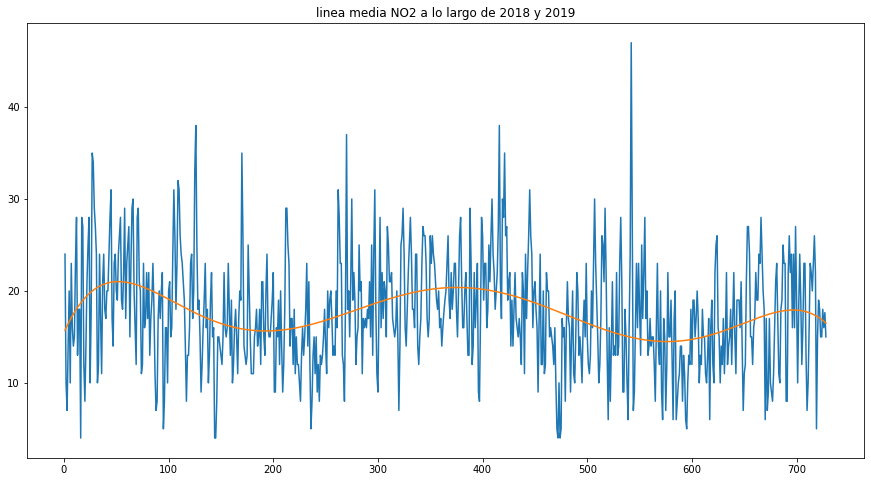

In [28]:
yl=np.poly1d(lineamediano2)
xl=np.arange(1,729)
plt.figure(figsize=(15,8))
plt.title('linea media NO2 a lo largo de 2018 y 2019')
plt.plot(dfContBarcPobl_PM10_NO2_2018_2019_rellenado['ndia'],dfContBarcPobl_PM10_NO2_2018_2019_rellenado['no2'], '-', xl, yl(xl), '-')
plt.show()

Por los gráficos se ve que parece existir una cierta relación anual cíclica, habiendo más pm10 en los veranos que en los inviernos, y más no2 en los inviernos que en los veranos.

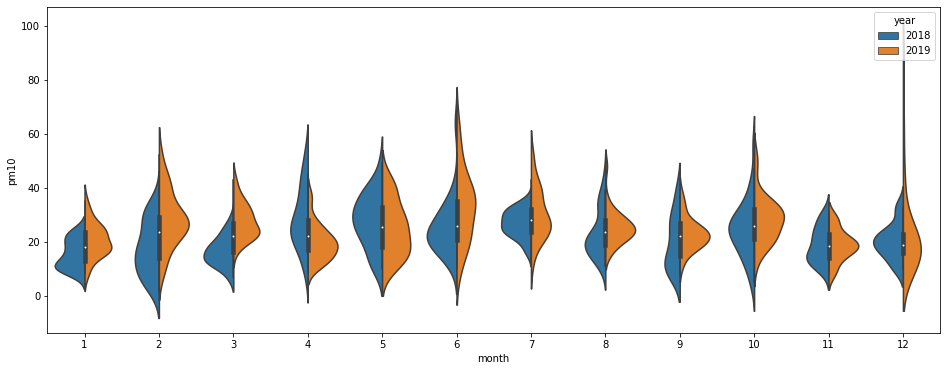

In [29]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='month',y='pm10',hue='year',data=dfContBarcPobl_PM10_NO2_2018_2019_rellenado, split=True);

Miramos ahora un grafico de cajas para ver si hay valores atípicos

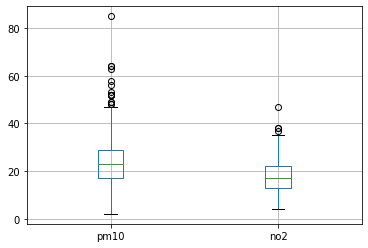

In [30]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.boxplot(column=['pm10','no2']);

Miramos cuántos valores atípicos tiene la medida de PM10

In [31]:
Q1=dfContBarcPobl_PM10_NO2_2018_2019_rellenado.pm10.quantile(0.25)
Q3=dfContBarcPobl_PM10_NO2_2018_2019_rellenado.pm10.quantile(0.75)
IQ=Q3-Q1
print(Q1)
print(Q3)
print(IQ)
print(Q1-1.5*IQ)
print(Q3+1.5*IQ)

17.0
29.0
12.0
-1.0
47.0


In [32]:
print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado.pm10.loc[dfContBarcPobl_PM10_NO2_2018_2019_rellenado.pm10>Q3+1.5*IQ])
print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado.pm10.loc[dfContBarcPobl_PM10_NO2_2018_2019_rellenado.pm10>Q3+1.5*IQ].shape)

date
2018-04-22    52.0
2018-04-23    52.0
2018-05-24    49.0
2018-06-24    64.0
2018-10-03    56.0
2019-02-23    52.0
2019-06-19    48.0
2019-06-24    64.0
2019-06-28    53.0
2019-06-29    58.0
2019-07-06    49.0
2019-07-07    52.0
2019-08-09    48.0
2019-10-08    52.0
2019-12-18    85.0
2019-12-19    63.0
Name: pm10, dtype: float64
(16,)


Hay 16 valores atípicos (por encima) de PM10

Ahora miramos lo mismo para la medida de NO2

In [33]:
Q1=dfContBarcPobl_PM10_NO2_2018_2019_rellenado.no2.quantile(0.25)
Q3=dfContBarcPobl_PM10_NO2_2018_2019_rellenado.no2.quantile(0.75)
IQ=Q3-Q1
print(Q1)
print(Q3)
print(IQ)
print(Q1-1.5*IQ)
print(Q3+1.5*IQ)

13.0
22.0
9.0
-0.5
35.5


In [34]:
print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado.no2.loc[dfContBarcPobl_PM10_NO2_2018_2019_rellenado.no2>Q3+1.5*IQ])
print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado.no2.loc[dfContBarcPobl_PM10_NO2_2018_2019_rellenado.no2>Q3+1.5*IQ].shape)

date
2018-05-07    38.0
2018-09-28    37.0
2019-02-21    38.0
2019-06-27    47.0
Name: no2, dtype: float64
(4,)


Hay 4 valores atípicos (por encima) de la medida de NO2

In [35]:
dftrabajo = pd.DataFrame()
dftrabajo['pm10-2019'] = dfContBarcPobl_PM10_NO2_2018_2019_rellenado['pm10']['2019':'2019']
dftrabajo['pm10-2018'] = dfContBarcPobl_PM10_NO2_2018_2019_rellenado['pm10']['2018':'2018']
dftrabajo.reset_index()

print(dftrabajo)

            pm10-2019  pm10-2018
date                            
2019-01-01  31.000000        NaN
2019-01-02  16.000000        NaN
2019-01-03  22.000000        NaN
2019-01-04  26.000000        NaN
2019-01-05  25.000000        NaN
...               ...        ...
2019-12-26  18.000000        NaN
2019-12-27  16.000000        NaN
2019-12-28  19.000000        NaN
2019-12-29  23.000000        NaN
2019-12-31  23.712692        NaN

[364 rows x 2 columns]


Vamos ahora a generar el fichero 'contaminacionBarcelona2018_2019.csv' con el Dataframe trabajado hasta ahora

In [36]:
try:
    dfContBarcPobl_PM10_NO2_2018_2019_rellenado.to_csv('contaminacionBarcelona2018_2019.csv', columns =['pm10','no2','year','month','day','month-day','ndia'], sep=",", encoding = 'utf-8', index='date')
except:
    print("Error al crear el fichero csv")